### Nguyễn Trần Lâm - 20016701

In [1]:
# import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pickle


#### Thông tin dữ liệu

Bộ dữ liệu bao gồm $150$ mẫu, $5$ thuộc tính bao gồm $1$ thuộc tính lớp.
- sepal length: chiều dài của đài hoa (cm)
- sepal width: chiều rộng của đài hoa (cm)
- petal length: chiều dài của cánh hoa (cm)
- petal width: chiều rộng của cánh hoa (cm)
- class: Thuộc tính lớp bao gồm: Iris Setosa, Iris Versicolour, Iris Virginica

## Bài 1.

#### 1.  Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với 4 đặc trưng đầu 

In [2]:
# load dữ liệu 

bezdek_df = pd.read_csv('data/bezdekIris.data', header=None)
bezdek_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']
iris_df = pd.read_csv('data/iris.data', header=None)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']


In [3]:
bezdek_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
bezdek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Xem số mẫu của của mỗi lớp
iris_df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
bezdek_df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

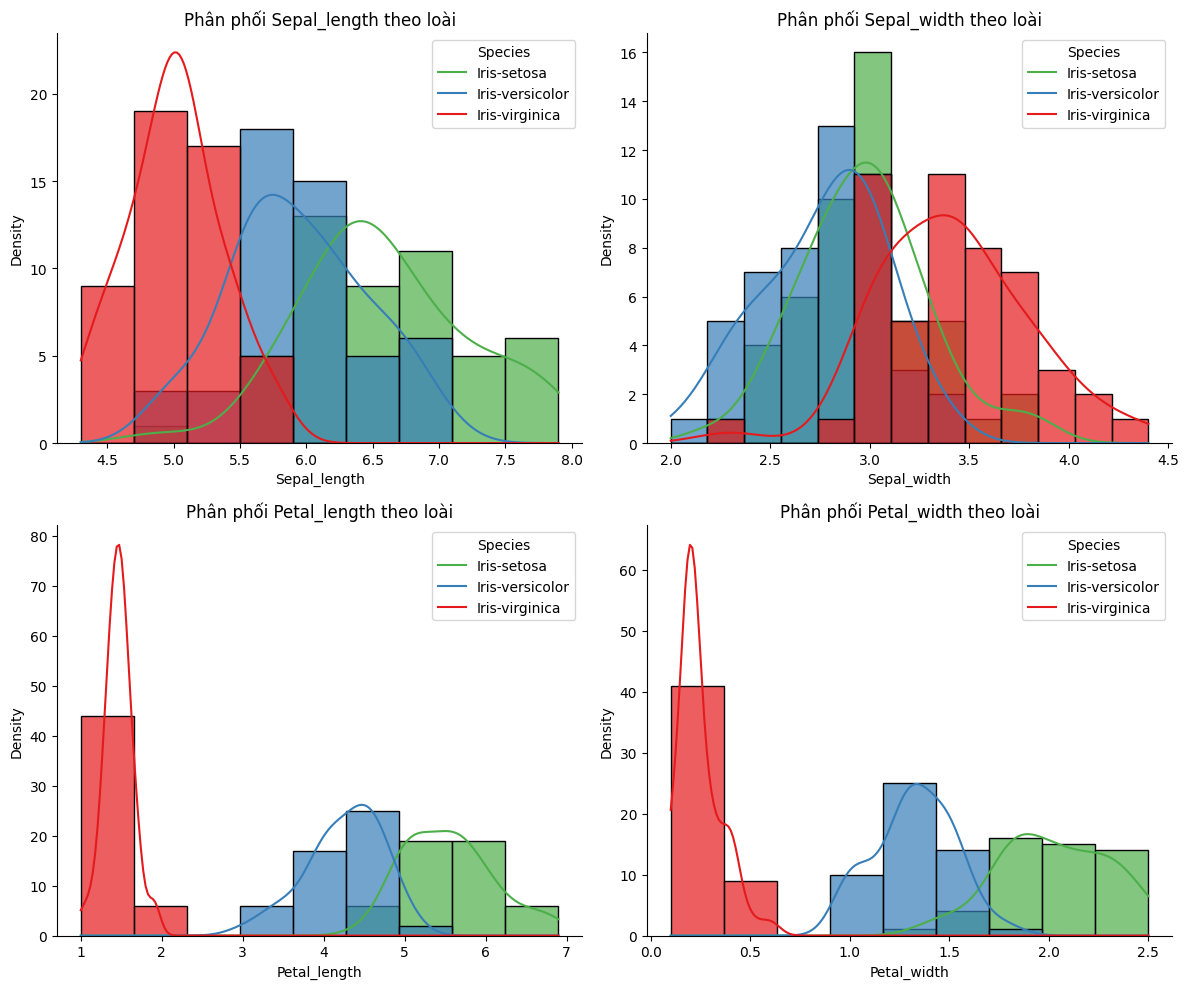

In [9]:
# Set theme for plots
columns = iris_df.columns.tolist()
columns.remove('Species')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]
    plot = sns.histplot(data=iris_df, x=col, hue='Species', ax=ax, kde=True, palette='Set1', alpha=0.7, common_norm=False)
    ax.set_title(f"Phân phối {col.capitalize()} theo loài")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Density")
    legend_labels = iris_df['Species'].unique()
    plot.legend(title="Species", labels=legend_labels)
    sns.despine()
plt.tight_layout()
plt.show()

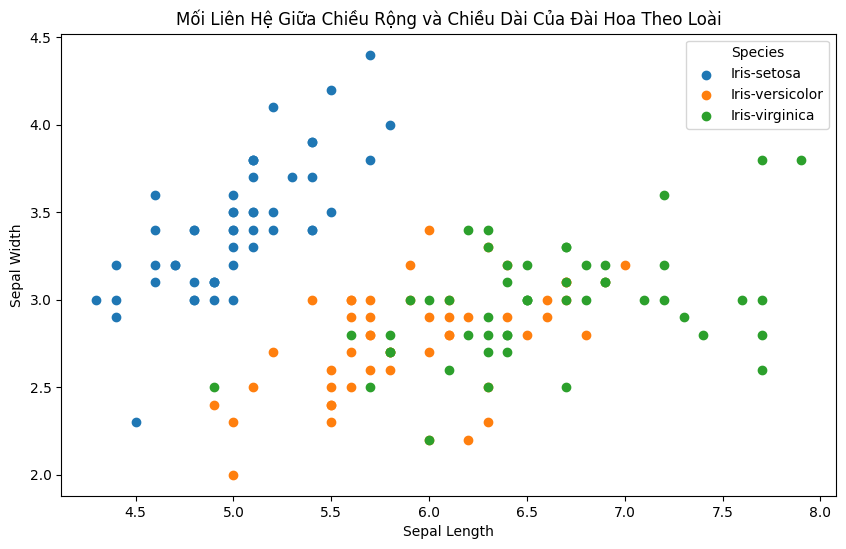

In [10]:
# Biểu đồ phân tán: Mối tương quan giữa chiều rộng và chiều dài của đài hoa 

plt.figure(figsize=(10, 6))
for species in iris_df['Species'].unique():
    subset = iris_df[iris_df['Species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)
plt.title("Mối Liên Hệ Giữa Chiều Rộng và Chiều Dài Của Đài Hoa Theo Loài")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
# Add legend
plt.legend(title="Species")

# Show the plot
plt.show()

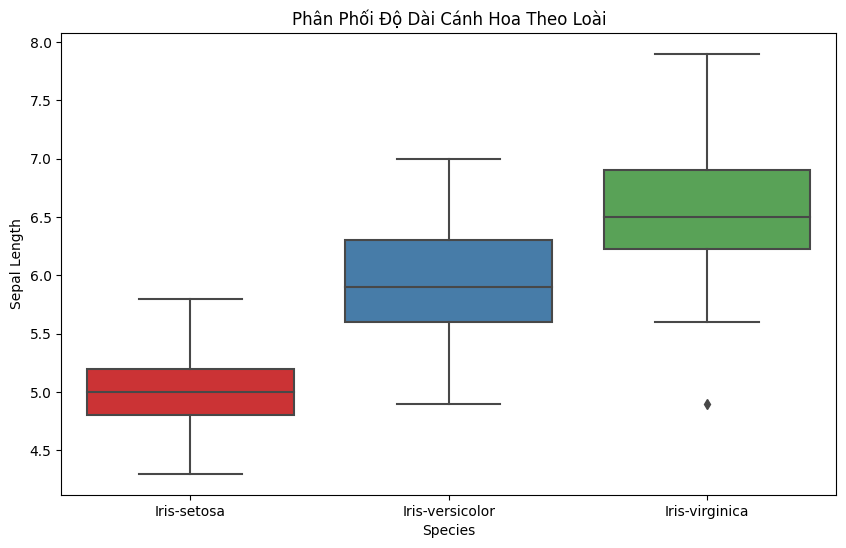

In [11]:
# Create a box plot with customizations
plt.figure(figsize=(10, 6))
sns.boxplot(x="Species", y="sepal_length", data=iris_df, palette="Set1")
plt.title("Phân Phối Độ Dài Cánh Hoa Theo Loài")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

C:\Users\lamnguyen\AppData\Local\Temp\ipykernel_4848\2422594832.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Species", y="sepal_length", data=iris_df, jitter=True, edgecolor="gray",


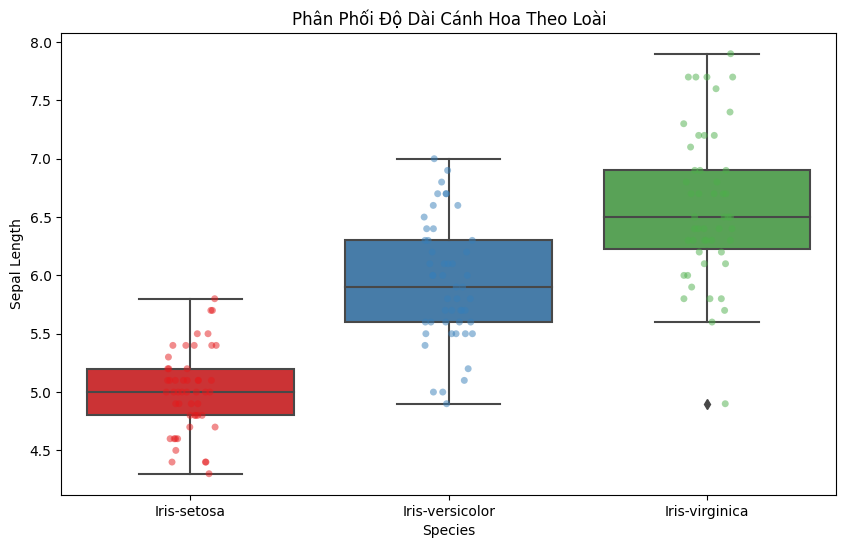

In [12]:
plt.figure(figsize=(10, 6))
# Box plot with color palette
sns.boxplot(x="Species", y="sepal_length", data=iris_df, palette="Set1")
sns.stripplot(x="Species", y="sepal_length", data=iris_df, jitter=True, edgecolor="gray",
              alpha=0.5, palette="Set1")

plt.title("Phân Phối Độ Dài Cánh Hoa Theo Loài")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

C:\Users\lamnguyen\AppData\Local\Temp\ipykernel_4848\3111044463.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Species", y=col, data=iris_df, jitter=True, edgecolor="gray",
C:\Users\lamnguyen\AppData\Local\Temp\ipykernel_4848\3111044463.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Species", y=col, data=iris_df, jitter=True, edgecolor="gray",
C:\Users\lamnguyen\AppData\Local\Temp\ipykernel_4848\3111044463.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Species", y=col, data=iris_df, jitter=True, edgecolor="gray",
C:\Users\lamnguyen\AppData\Local\Temp\ipykernel_4848\3111044463.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Species", y=col, data=iris_df, jitter=True, edgecolor="gray",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are i

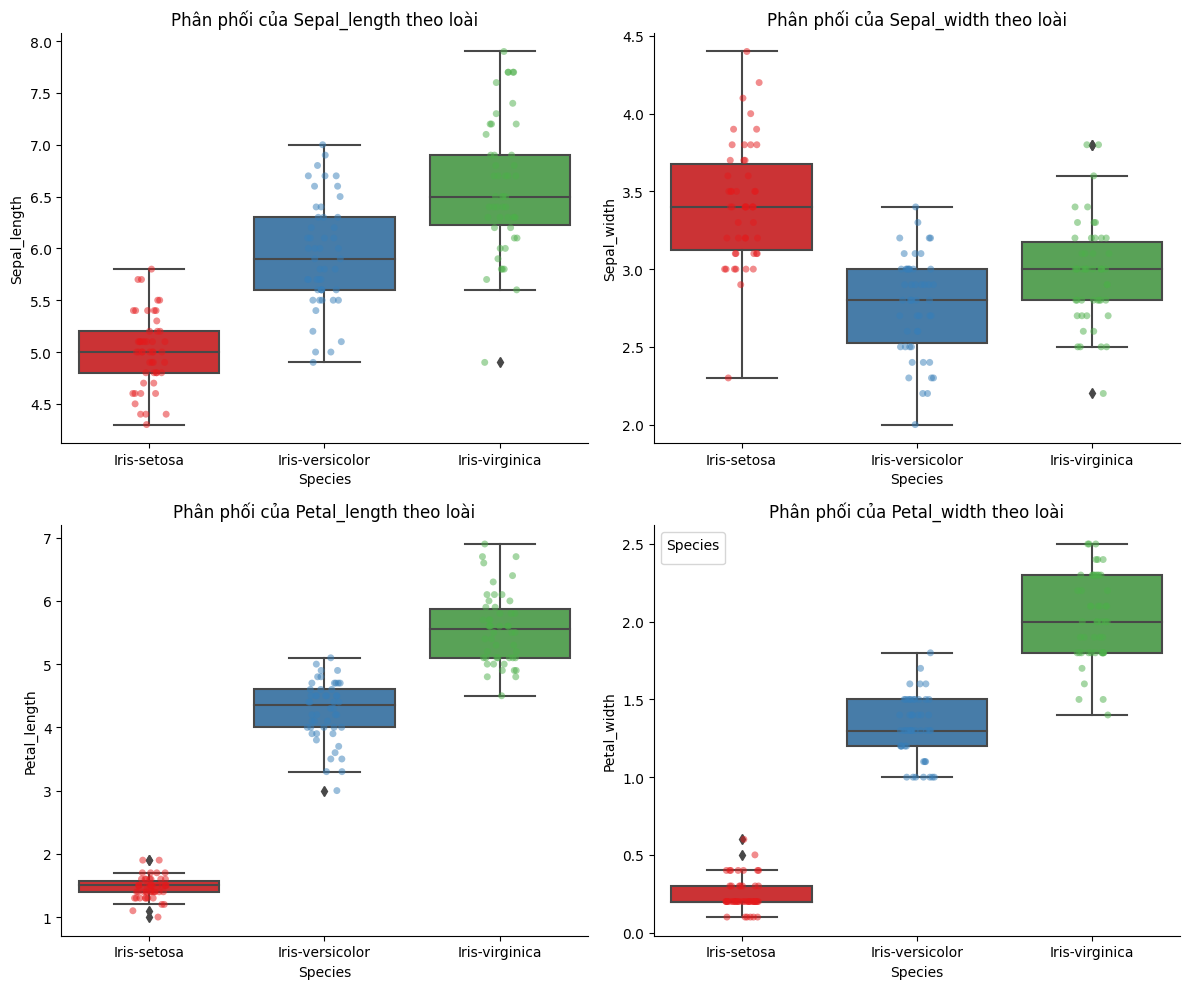

In [13]:
columns = iris_df.columns.tolist()
columns.remove('Species')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    ax = axes[row, col_index]
    sns.boxplot(x="Species", y=col, data=iris_df, palette="Set1", ax=ax)
    sns.stripplot(x="Species", y=col, data=iris_df, jitter=True, edgecolor="gray",
                  alpha=0.5, palette="Set1", ax=ax)
    ax.set_title(f"Phân phối của {col.capitalize()} theo loài")
    ax.set_xlabel("Species")
    ax.set_ylabel(col.capitalize())
    sns.despine()
plt.legend(title="Species")
plt.tight_layout()
plt.show()

c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figur

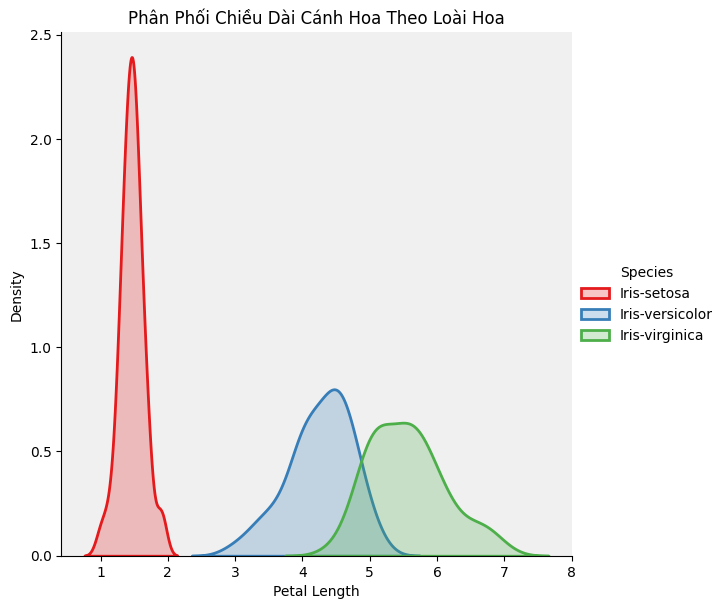

In [14]:
palette = sns.color_palette("Set1")

grid = sns.FacetGrid(iris_df, hue="Species", height=6, palette=palette)
grid.map(sns.kdeplot, "petal_length", linewidth=2, shade=True)
grid.add_legend()

plt.title("Phân Phối Chiều Dài Cánh Hoa Theo Loài Hoa")
plt.xlabel("Petal Length")
plt.ylabel("Density")
ax = plt.gca()
ax.set_facecolor('#f0f0f0')  
plt.show()

c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn

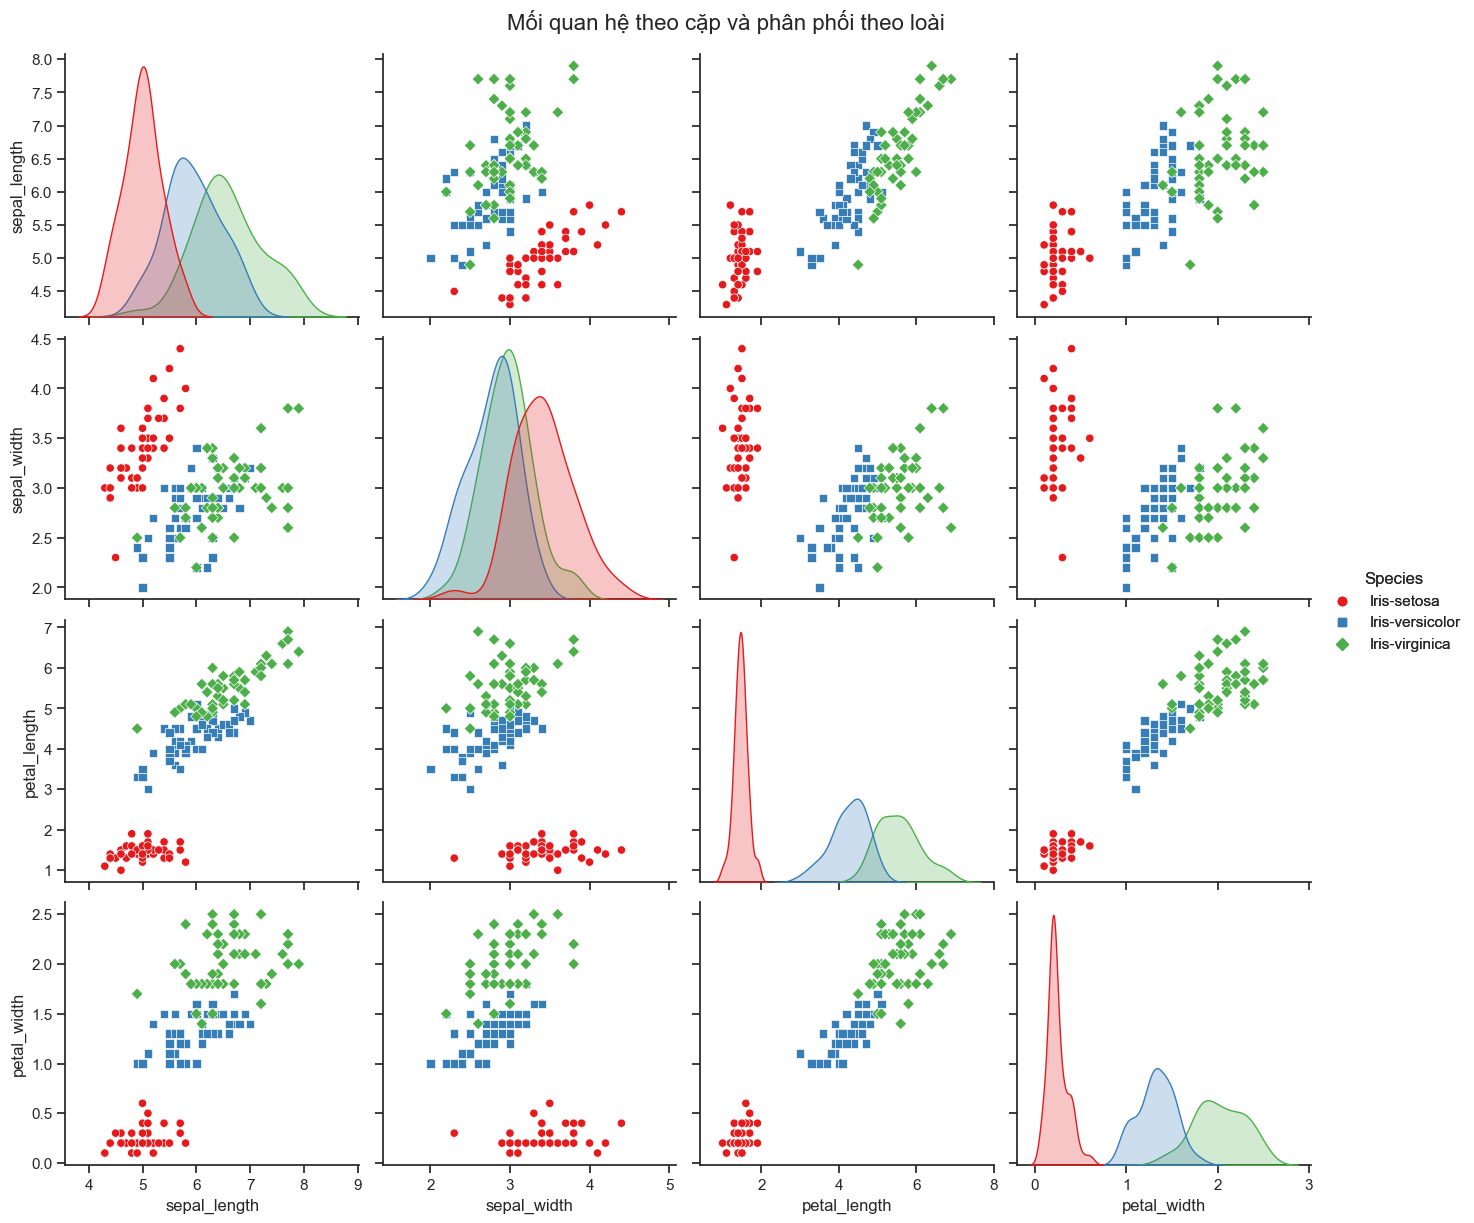

In [15]:
sns.set(style="ticks")
palette = sns.color_palette("Set1")

# Create pairplot with customizations
g = sns.pairplot(iris_df, hue="Species", height=3, palette=palette, markers=["o", "s", "D"])
g.add_legend(title="Species")
g.fig.suptitle("Mối quan hệ theo cặp và phân phối theo loài", fontsize=16, y=1.02)

# Show the plot
plt.show()

#### 2. Chuyển đổi thuộc tính lớp thành số 1 cách tự động 

In [16]:
label_encoder = LabelEncoder()
# Chuyển đổi thuộc tính loài hoa sang số
iris_df['class']= label_encoder.fit_transform(iris_df['Species'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### 3.  Sử dụng 4 đặc trưng của bộ dữ liệu, chia bộ dữ liệu thành 2 phần Train/Test với tỉ lệ 7:3, cho biết trong bộ dữ liệu đã cho có dữ liệu nào null không, phân tích bộ dữ liệu theo từng lớp qua các biểu đồ.

In [17]:
# Chia dữ liệu 
df = iris_df.copy()
df.drop('Species', axis=1, inplace=True)

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

=> Không có dữ liệu null trong bộ dữ liệu 

- Phân tích bộ dữ liệu theo từng lớp qua các biểu đồ 

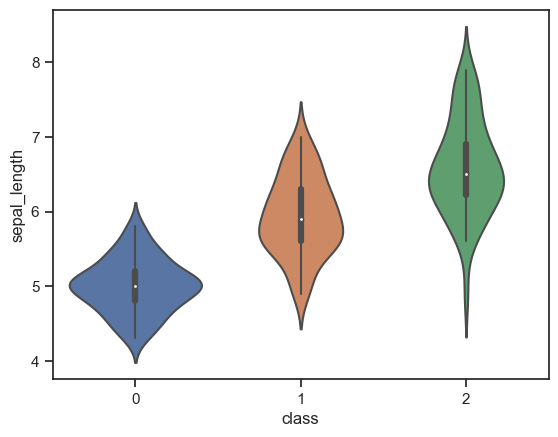

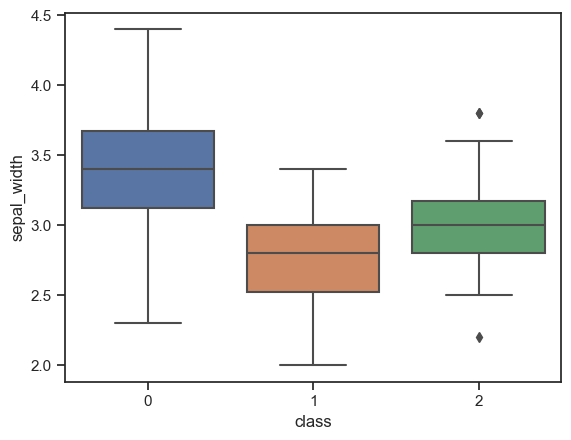

c:\Users\lamnguyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


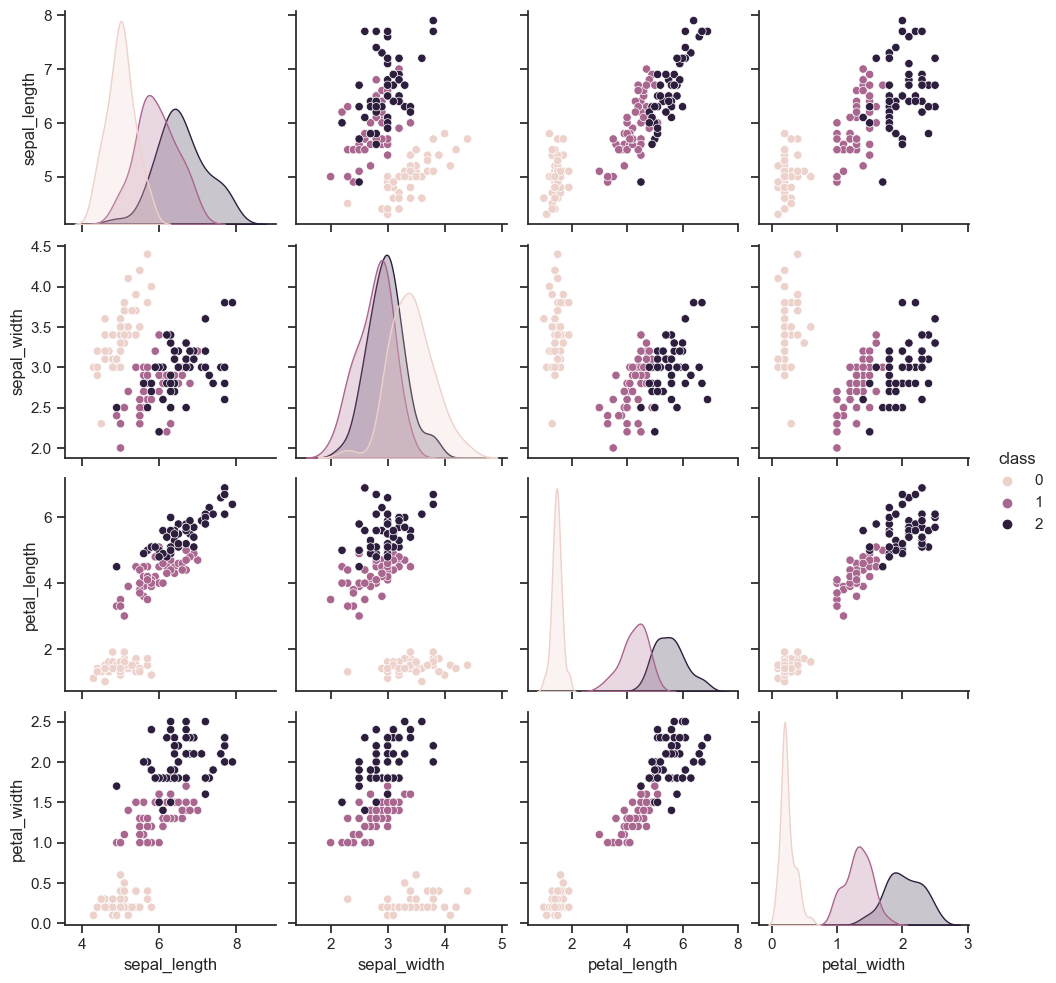

In [18]:
# Phân tích đặc trưng theo lớp sử dụng biểu đồ violin
sns.violinplot(x="class", y="sepal_length", data=df)
plt.show()

# Phân tích đặc trưng theo lớp sử dụng biểu đồ hộp
sns.boxplot(x="class", y="sepal_width", data=df)
plt.show()

# Biểu đồ phân tán giữa các đặc trưng theo lớp
sns.pairplot(df, hue="class")
plt.show()

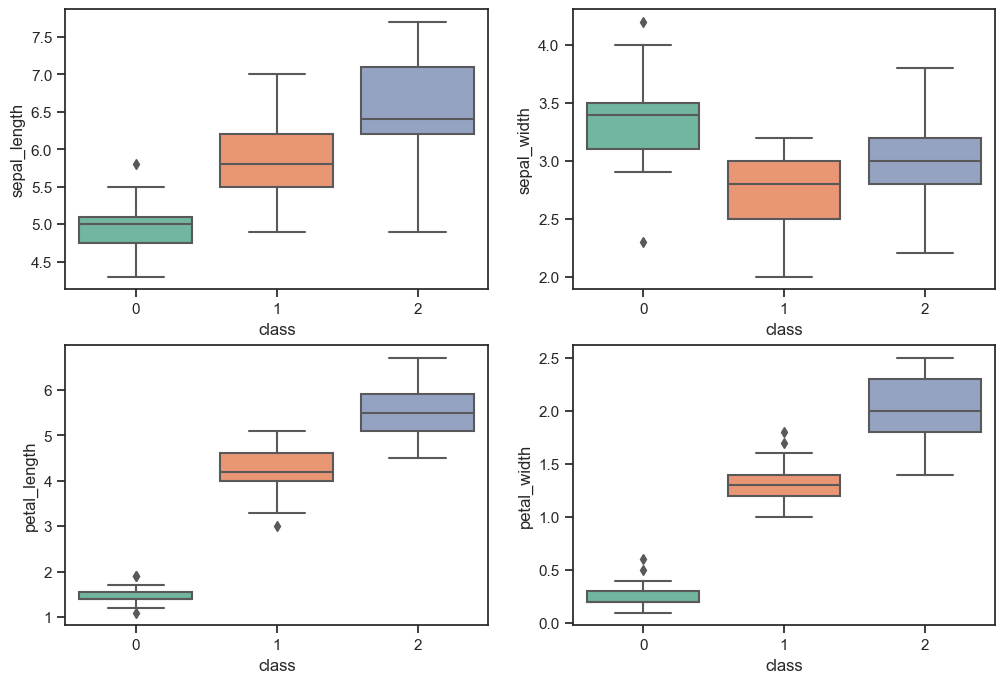

In [19]:
columns = X_train.columns
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i,col in enumerate(columns):
    sns.boxplot(x=y_train, y=col, data=df_train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

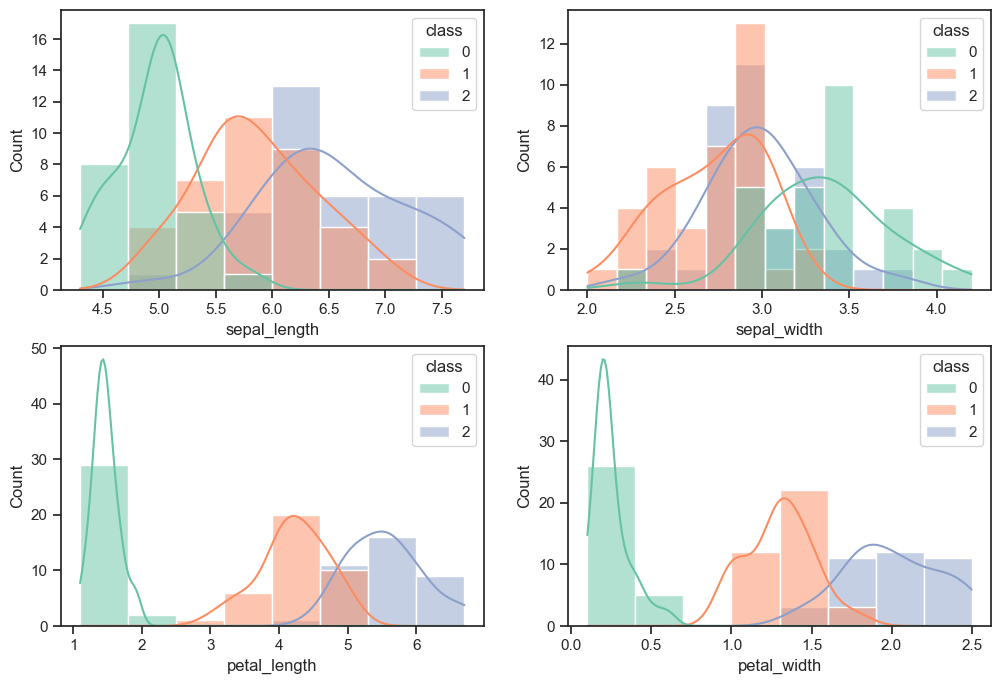

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i,col in enumerate(columns):
    sns.histplot(data=df_train, x=col, hue=y_train, ax=ax[i//2][i%2], kde=True,palette='Set2')
plt.show()

#### 4.  Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 5-Fold (k-fold)

In [21]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
k_values = [1, 3, 5, 7,  8]  
results = {}

for k in k_values:
    accuracy_scores = []
    
    for train_idx, val_idx in k_fold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val_fold)
        
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracy_scores.append(accuracy)
    
    results[k] = accuracy_scores 

# In kết quả
for k, scores in results.items():
    avg_accuracy = np.mean(scores)
    print(f'K = {k}, Average Accuracy: {avg_accuracy:.4f}')

K = 1, Average Accuracy: 0.9333
K = 3, Average Accuracy: 0.9524
K = 5, Average Accuracy: 0.9238
K = 7, Average Accuracy: 0.9143
K = 8, Average Accuracy: 0.9333


=> Giá trị K=3 cho thấy độ chính xác trung bình cao nhất trong phương pháp 5-Fold Cross-Validation trên bộ dữ liệu Iris.

#### 5.  Huấn luyện dữ liệu cho bài toán phân lớp sử dụng 4 đặc trưng trên với các giải thuật Bayes, SVM, Linear Regression và Decision Tree. 

In [23]:
# Khởi tạo các mô hình
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # tính độ do accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # tính độ do f1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, f1, cm

for model_name, model in models.items():
    accuracy, f1, cm = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

Model: Naive Bayes
Accuracy: 0.9777777777777777
F1 Score: 0.9777448559670783
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
------------------------------
Model: SVM
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
------------------------------
Model: Logistic Regression
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
------------------------------
Model: Decision Tree
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
------------------------------


#### 10.  Lưu model với kết quả tốt nhất 

In [26]:
# Lưu model với kết quả tốt nhất
Decision_Tree = models['Decision Tree'] 
with open('Decision_Tree.pkl', 'wb') as f:
    pickle.dump(Decision_Tree, f)

In [27]:
# Lưu tất cả model để thực hiện tải lên trang web
for model_name, model_obj in models.items():
    filename = model_name.replace(" ", "_") + '.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model_obj, f)


#### 11. Link ứng dụng: 

## Bài 2. Hãy tạo một tài khoản ChatGPT và tìm câu trả lời cho 2 câu hỏi sau từ ChatGPT:

#### 1.  Hãy cho biết kiến trúc tổng quát của ChatGPT và từng thành phần cụ thể của các phần trong kiến trúc này.